In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('salary.csv')

In [5]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43,Other,PhD,Data Analyst,2,78913
1,23,Female,PhD,Biotechnologist,9,110403
2,25,Female,High School,Research Scientist,7,39666
3,32,Other,Master's,Research Scientist,3,91913
4,41,Male,Bachelor's,Data Analyst,26,40868
...,...,...,...,...,...,...
95,28,Other,High School,Lab Technician,19,125371
96,30,Female,PhD,Research Scientist,24,149805
97,45,Female,Master's,Quality Control Specialist,9,146587
98,31,Male,Master's,Research Scientist,11,49128


In [7]:
mean_values = df.mean(numeric_only=True)

In [9]:
print(mean_values)

Age                       39.75
Years of Experience       14.97
Salary                 93616.05
dtype: float64


In [11]:
df.loc[:,'Age'].mean()

39.75

In [13]:
 median_value =df.median(numeric_only=True)
 print(median_value)

Age                        40.5
Years of Experience        15.0
Salary                 100757.0
dtype: float64


In [19]:
 df.loc[:,'Age'].median()

40.5

In [21]:
mode_value= df.mode(numeric_only=True).iloc[0]
print(mode_value)

Age                       43.0
Years of Experience        9.0
Salary                 31887.0
Name: 0, dtype: float64


In [23]:
df.loc[:,'Age'].mode()

0    43
Name: Age, dtype: int64

In [25]:
df.min()

Age                                 22
Gender                          Female
Education Level             Bachelor's
Job Title              Biotechnologist
Years of Experience                  0
Salary                           31887
dtype: object

In [27]:
df.loc[:,'Age'].min(skipna = False)

22

In [29]:
df.max()

Age                                    60
Gender                              Other
Education Level                       PhD
Job Title              Research Scientist
Years of Experience                    30
Salary                             149963
dtype: object

In [31]:
df.loc[:,'Age'].max(skipna = False)

60

In [33]:
std_values = df.std(numeric_only=True)
print(std_values)

Age                       11.428632
Years of Experience        8.678843
Salary                 35796.187433
dtype: float64


In [35]:
df.loc[:,'Age'].std()

11.428632305032671

In [37]:
df.groupby(['Gender'])['Age'].mean()

Gender
Female    36.296296
Male      41.941176
Other     40.230769
Name: Age, dtype: float64

In [39]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['Gender']]).toarray())
enc_df

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
95,0.0,0.0,1.0
96,1.0,0.0,0.0
97,1.0,0.0,0.0
98,0.0,1.0,0.0


In [41]:
df_u= df.rename(columns={'Salary)':'Income'},inplace=False)
print(df_u.groupby('Gender')['Salary'].mean())

Gender
Female    98657.666667
Male      91067.970588
Other     92347.102564
Name: Salary, dtype: float64


In [43]:
df_encode =df_u.join(enc_df)
print(df_encode)

    Age  Gender Education Level                   Job Title  \
0    43   Other             PhD                Data Analyst   
1    23  Female             PhD             Biotechnologist   
2    25  Female     High School          Research Scientist   
3    32   Other        Master's          Research Scientist   
4    41    Male      Bachelor's                Data Analyst   
..  ...     ...             ...                         ...   
95   28   Other     High School              Lab Technician   
96   30  Female             PhD          Research Scientist   
97   45  Female        Master's  Quality Control Specialist   
98   31    Male        Master's          Research Scientist   
99   54    Male             PhD                Data Analyst   

    Years of Experience  Salary    0    1    2  
0                     2   78913  0.0  0.0  1.0  
1                     9  110403  1.0  0.0  0.0  
2                     7   39666  1.0  0.0  0.0  
3                     3   91913  0.0  0.0  1.0 

In [57]:
import pandas as pd
skewness= df_encode.select_dtypes(include=['number']).skew()
print("Skewnessof numericalcolumns:")
print(skewness)

Skewnessof numericalcolumns:
Age                    0.084161
Years of Experience    0.101069
Salary                -0.190685
0                      1.051977
1                      0.685851
2                      0.457949
dtype: float64


In [59]:
import numpy as np
from scipy import stats

In [61]:
z =np.abs(stats.zscore(df['Salary']))

In [77]:
z

0     0.412813
1     0.471322
2     1.514738
3     0.047816
4     1.480990
        ...   
95    0.891573
96    1.577599
97    1.487248
98    1.249076
99    0.705540
Name: Salary, Length: 100, dtype: float64

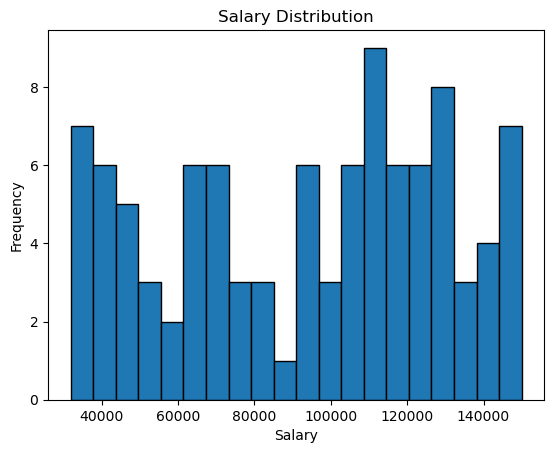

In [81]:
import matplotlib.pyplot as plt

new_df = df.copy()
new_df['Salary'].plot(kind='hist', bins=20, edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.show()


In [ ]:
df['log_math'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
 plt.xlabel('Log10(Salary)')
 plt.ylabel('Frequency')
 plt.title('Log-Transformed Salary Distribution')
 plt.show()